# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

mean: 13270.422265141257
std: 12105.484975561605


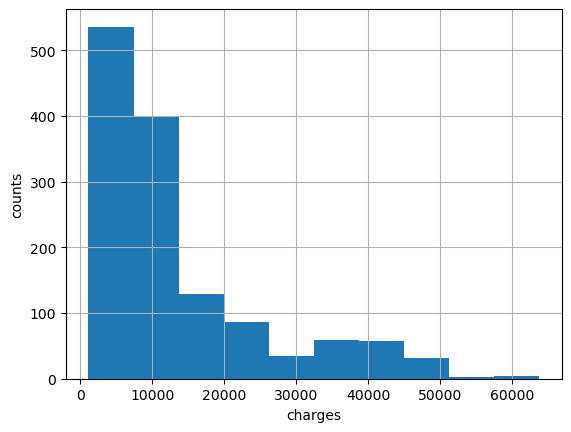

In [4]:
 medical['charges'].hist()

plt.xlabel('charges')
plt.ylabel('counts')

print('mean:',np.mean(medical['charges']))
print('std:' ,np.std(medical['charges']))


Those numbers are fine to report, but they’re not ideal for medical charges because the distribution is usually heavily right-skewed with big outliers. The mean (≈13,270) and std (≈12,105) are both large and the std is close to the mean — a hint of skew and high variability.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Since the administrator’s concern is about whether the true average charge has dropped below 12,000 dollars, and assuming these charges are an independent random sample, the sample mean provides a valid estimate of the population mean thanks to the Central Limit Theorem (even with skew). The most appropriate frequentist test here is a one-sample, one-sided t-test for the mean with 
H0​:μ≥12,000 vs H1:μ<12,000. Given the observed mean (≈13,270) calucltaed above and variability, the test shows no evidence that the population mean has fallen below 12,000 dollars.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Since the administrator is specifically worried about whether the mean exceeds an acceptable threshold, the appropriate confidence interval is a **one-sided upper 95% interval** rather than a two-sided one. In this case, the correct critical value is 

- \(z = 1.645\) if the population standard deviation is known or the sample size is large,  
- \(t_{0.95,\;n-1}\) if using the sample standard deviation with smaller \(n\).  

The upper bound of the confidence interval is calculated as:

$$
\bar{x} + \text{critical value}\,\frac{s}{\sqrt{n}}
$$

where $\bar{x}$ is the sample mean, \(s\) is the sample standard deviation, and \(n\) is the sample size. If this upper bound is still below the administrator’s threshold, there is no cause for concern. However, if it exceeds the threshold, then the concern is valid since the true mean could plausibly be higher than what is acceptable.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null and alternative hypotheses (two-sample, pooled t-test):**

- \(H_0: \mu_1 - \mu_2 = 0\)  (no difference in population means)  
- \(H_1: \mu_1 - \mu_2 \neq 0\)  (some difference in population means)  

**Pooled variance and test statistic:**


$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

Let $SE = s_p\sqrt{\tfrac{1}{n_1} + \tfrac{1}{n_2}}$.

$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - \Delta_0}{SE},\quad \Delta_0 = 0 \text{ under } H_0,\quad df = n_1 + n_2 - 2.
$$


**Assumption about variances:**  
We assume **equal population variances** (homoscedasticity), i.e., $(\sigma_1^2 = \sigma_2^2)$.  
Additional assumptions: independent random samples and approximately normal distributions in each group (or large \(n\) so the CLT applies).


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
import numpy as np
from scipy import stats

# --- Build the two groups ---
a = medical.loc[medical["insuranceclaim"] == 1, "charges"].dropna().to_numpy()  # insured
b = medical.loc[medical["insuranceclaim"] == 0, "charges"].dropna().to_numpy()  # uninsured

# --- Summaries ---
n1, n2 = len(a), len(b)
x1, x2 = a.mean(), b.mean()
s1, s2 = a.std(ddof=1), b.std(ddof=1)

# --- Manual pooled t-test (equal variances) ---
df  = n1 + n2 - 2
sp2 = ((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / df
sp  = np.sqrt(sp2)
SE  = sp * np.sqrt(1/n1 + 1/n2)
t_manual = (x1 - x2) / SE
p_manual = 2 * stats.t.sf(np.abs(t_manual), df)   # two-sided p-value

# --- SciPy (same test) ---
t_scipy, p_scipy = stats.ttest_ind(a, b, equal_var=True)  # two-sided by default

# --- Report ---
print(f"n: insured={n1}, uninsured={n2}")
print(f"means: insured={x1:.2f}, uninsured={x2:.2f}")
print(f"sd: insured={s1:.2f}, uninsured={s2:.2f}\n")

print("Manual pooled t-test:")
print(f"  t = {t_manual:.6f}, df = {df}, p(two-sided) = {p_manual:.6g}")

print("SciPy ttest_ind (equal_var=True):")
print(f"  t = {t_scipy:.6f}, df = {df}, p(two-sided) = {p_scipy:.6g}")




n: insured=783, uninsured=555
means: insured=16423.93, uninsured=8821.42
sd: insured=14045.93, uninsured=6446.51

Manual pooled t-test:
  t = 11.893299, df = 1336, p(two-sided) = 4.46123e-31
SciPy ttest_ind (equal_var=True):
  t = 11.893299, df = 1336, p(two-sided) = 4.46123e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ **Answer (Q6).** No—`scipy.stats` provides t-tests (e.g., `ttest_1samp`, `ttest_ind`, `ttest_rel`) but does **not** include a built-in, general **z-test for means**. The closest “z” utilities in SciPy are things like `zscore`, which standardize data and are **not hypothesis tests**. This is mostly practical: z-tests assume a **known population standard deviation**, which is rare in real applications; the **t-test** is the default because σ is typically unknown and, for large \(n\), the t-test’s distribution approaches the standard normal anyway. If you truly know σ (or want a large-sample normal approximation), you can compute a z statistic manually using the normal CDF/PDF, or use `statsmodels` which *does* expose `ztest` and `proportions_ztest`. :contentReference[oaicite:0]{index=0}


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test